### Mini-Capstone: Análisis de clustering

El presente notebook puede servir como un ejemplo de Mini-Capstone para estudios que impliquen el uso de técnicas de agrupamiento.

**Índice**
  - [Problema: Contexto Empresarial](#contexto)
  - [Objetivos del estudio](#objetivos)
  - [Analisis exploratorio](#eda)
  - Modelado (clustering)
    - [KMeans](#kmeans)
    - [Jerárquico](#jerarquico)
    - [Comparación de modelos](#comparacion)
  - [Resultados](#resultados)
  - [Implicaciones empresariales](#implicaciones)
  - [Conclusiones y recomendaciones](#conclusiones)
  - [Anexo](#anexo): Ejercicio - Análsis exploratorio.

### Estudio de segmentos de clientes de un centro comercial local

<a name="contexto"></a>

**Contexto empresarial**

Un centro comercial busca comprender mejor a sus clientes para mejorar la experiencia de compra y optimizar sus estrategias de marketing. Para lograr esto, el equipo de gestión del centro comercial ha recopilado un conjunto de datos, que contiene información demográfica y de comportamiento de consumo de los clientes. El objetivo es realizar un análisis de clustering para identificar segmentos de clientes con características y comportamientos similares.

El centro comercial enfrenta desafíos tales como la necesidad de ofrecer una experiencia de compra única y personalizada, optimizar el flujo de clientes entre las diferentes tiendas, y mejorar la eficacia de las estrategias de marketing y promoción. Al segmentar a los clientes en grupos homogéneos mediante el análisis de clustering, el centro comercial podrá identificar patrones de comportamiento de compra, preferencias de productos y perfiles demográficos específicos.

Utilizando esta información, el centro comercial podrá diseñar estrategias dirigidas a cada segmento de clientes, como promociones personalizadas, eventos especiales y servicios adicionales, con el objetivo de mejorar la experiencia del cliente y aumentar la fidelidad. Además, este enfoque permitirá al centro comercial diferenciarse de la competencia al ofrecer una experiencia de compra más relevante y satisfactoria para sus clientes.

El centro comercial busca establecerse como el destino preferido para las compras y el entretenimiento, ofreciendo una oferta única y diversa que responda a las necesidades y deseos cambiantes de los consumidores, y así consolidar su posición como líder en el mercado minorista en medio de una competencia cada vez más intensa.

El conjunto de datos **"Mall_Customers.csv"** contiene información sobre clientes de un centro comercial y contiene columnas que describen diferentes aspectos demográficos y de comportamiento de los clientes. A continuación se da una descripción de las columnas de este conjunto de datos:

1. **CustomerID:** Un identificador único para cada cliente en el centro comercial.
2. **Gender:** El género del cliente, que puede ser masculino o femenino.
3. **Age:** La edad del cliente.
4. **Annual Income (k$):** El ingreso anual del cliente en miles de dólares.
5. **Spending Score (1-100):** Una puntuación asignada por el centro comercial basada en el comportamiento de compra del cliente y otros factores, que indica cuán propenso es el cliente a gastar.

Este conjunto será utilizado para realizar análisis de segmentación de clientes, entender patrones de comportamiento de compra, identificar grupos demográficos específicos para campañas de marketing dirigidas, entre otros análisis relacionados con la gestión de clientes en un entorno minorista.

<a name="objetivos"></a>

### Objetivos del estudio:

1. **Segmentación de Clientes:** Identificar grupos homogéneos de clientes con características y comportamientos de compra similares.

2. **Perfilamiento Demográfico:** Describir los perfiles demográficos de cada segmento de clientes identificado, incluyendo edad, género, ingresos, entre otros.

3. **Análisis de Preferencias:** Analizar las preferencias de productos y servicios de cada segmento de clientes para comprender qué productos son más populares en cada grupo.

4. **Predicción de Comportamiento:** Predecir el comportamiento futuro de los clientes en función de su segmento de pertenencia, como las tendencias de compra o la frecuencia de visita al centro comercial.

5. **Optimización de Promociones:** Diseñar estrategias de marketing y promoción específicas para cada segmento de clientes para aumentar la efectividad y la relevancia de las promociones.

6. **Mejora de la Experiencia del Cliente:** Identificar áreas de mejora en la experiencia del cliente en el centro comercial, como la disposición de las tiendas o la variedad de servicios ofrecidos.

7. **Fidelización de Clientes:** Desarrollar programas de fidelización y retención de clientes adaptados a las necesidades y preferencias de cada segmento identificado.

8. **Diferenciación Competitiva:** Utilizar los hallazgos del estudio para diferenciar al centro comercial de sus competidores y fortalecer su posición en el mercado minorista y por lo tanto maximización de ingresos.

### Carga de datos

In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/main/data/Mall_Customers.csv", 
                   index_col=0)
data.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40

<a name="eda"></a>

### Análisis descriptivo y exploratorio

En el pairplot, se observan gráficos de dispersión para cada pareja de variables, utilizando Gender como variable categórica para distinguir entre grupos. En la diagonal del pair plot, se muestran gráficos de densidad agrupados por la variable Gender para las diferentes variables numéricas. No se observa una separación clara basada en el género en estos gráficos de densidad, lo que sugiere que la variable Gender podría no ser influyente en nuestro estudio. Por lo tanto, decidimos omitir esta variable en nuestro análisis. Utilizaremos el algoritmo K-means con el resto de las variables numéricas disponibles.

En los gráficos de dispersión, los puntos naranjas y azules correspondientes al género femenino y masculino, respectivamente, tampoco muestran una separación evidente. Esto refuerza la conclusión de que la variable género podría no ser un factor significativo en nuestro análisis.

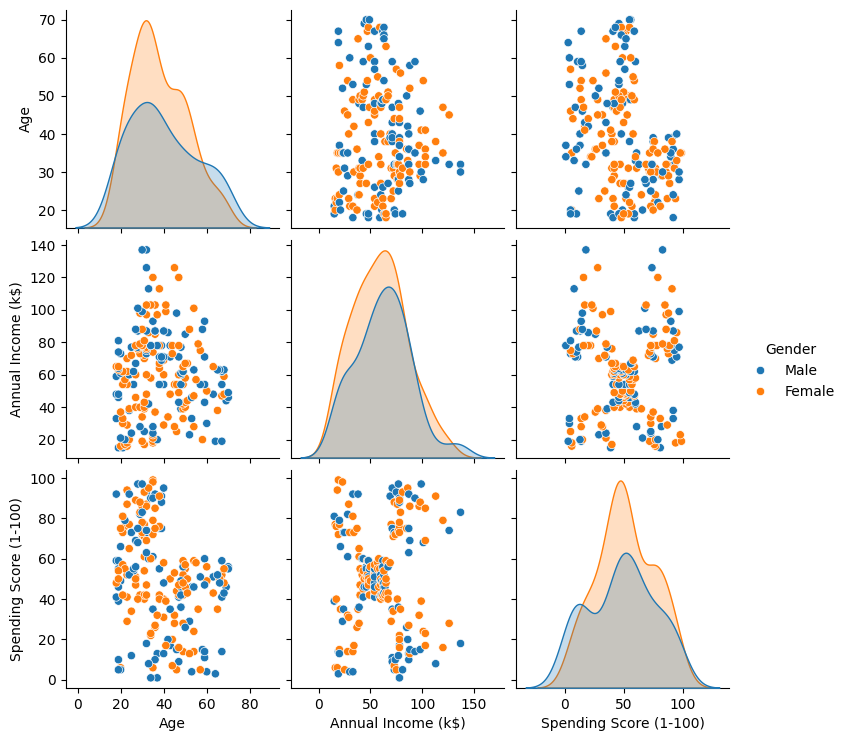

In [2]:
# pairplot (hue by Gender, only categorical variable)
sns.pairplot(data, hue="Gender")
plt.show()

En el gráfico de dispersión de Spending Score vs Annual Income, ubicado en el panel central izquierdo (sexto panel leyendo por filas de arriba a abajo), se observa una estructura discernible en los datos. Una parte significativa de las observaciones se agrupa alrededor del centro (medias de las variables), mientras que otras se dividen en dos grupos distintos: uno caracterizado por valores bajos de Annual Income y altos y bajos de Spending Score, y otro por valores altos de Annual Income y altos y bajos de Spending Score. Esta estructura sugiere la presencia de grupos subyacentes en los datos. Para validar esta observación, realizaremos un análisis con el algoritmo K-means y comprobaremos si los grupos identificados coinciden con estos patrones observados en el gráfico de dispersión.

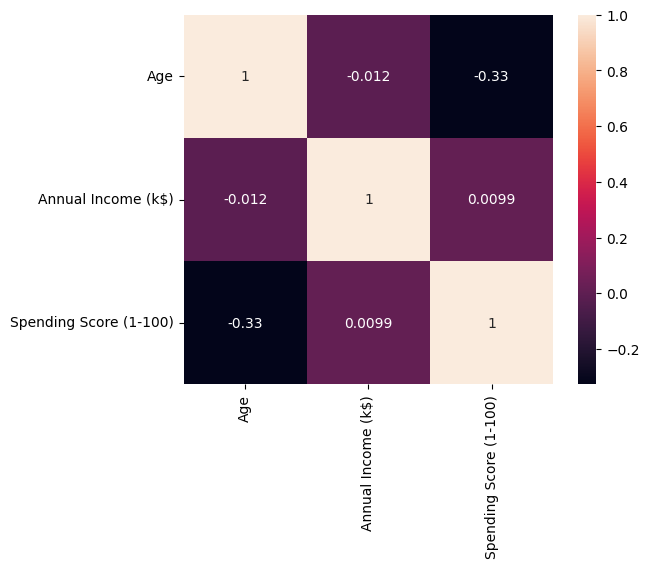

In [3]:
# get only numerical columns 
sns.heatmap(data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].corr(), annot=True, square=True)
plt.show()

<a name="kmeans"></a>

### Modelado

**Preprocesamiento para KMeans**

- Selección de variables numéricas
  - K-means es un algoritmo de clustering que solo puede manejar variables numéricas, ya que se basa en cálculos de distancia entre puntos en un espacio multidimensional. Por lo tanto, antes de aplicar el algoritmo K-means, es necesario asegurarse de que todas las variables utilizadas en el análisis sean numéricas. 

- Escalado de datos
  - **Escalado Estándar (Z-score normalization)**: Este método transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Esto se logra restando la media de cada característica y dividiendo por la desviación estándar. Es útil cuando los datos tienen distribuciones gaussianas o similares.

In [4]:
# get only numerical columns
data_num = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

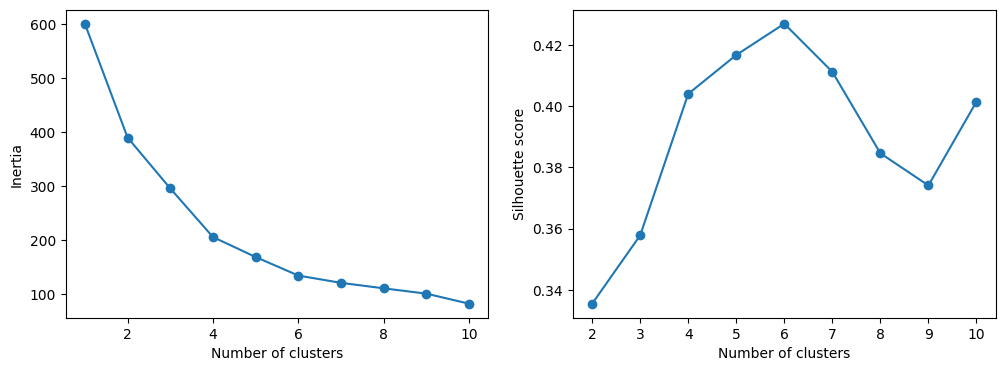

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []  # inertia
ss = []  # silhouette score
test_clusters = 10
for cluster in range(1,test_clusters+1):
    kmeans = KMeans(n_clusters=cluster, n_init="auto", random_state=12345)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    labels = kmeans.predict(data_scaled)
    if cluster > 1:
        ss.append(silhouette_score(data_scaled, labels))

# converting the results into a dataframe and plotting them
frame_in = pd.DataFrame({'Cluster':range(1,test_clusters+1), 'SSE':SSE}) 
frame_ss = pd.DataFrame({'Cluster':range(2,test_clusters+1), 'Silhouette score': ss})
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(frame_in['Cluster'], frame_in['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
#plt.xticks(frame.Cluster[1::2]);
plt.subplot(1,2,2)
plt.plot(frame_ss['Cluster'], frame_ss['Silhouette score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

En el gráfico de la evaluación por codo, se observa que la inercia disminuye a medida que aumenta el número de clusters, ya que cada punto tiende a estar más cerca de su centroide en clústeres más pequeños. Sin embargo, en algún punto, la disminución en la inercia comienza a disminuir significativamente, formando un "codo" en el gráfico. Este punto, o el número de clusters correspondiente, se considera el punto óptimo en términos de equilibrio entre la compacidad de los clústeres y el número de clústeres. 

- **En el panel de la izquierda podemos apreciar que los codos aparecen para 2, 4, y 6 clústeres.**

En el análisis de silueta se busca maximizar el valor de la medida de la silueta para decidir el número óptimo de clusters en un análisis de clustering. Un valor de silueta cercano a 1 indica que los clusters están bien definidos y que los puntos están bien separados de otros clusters, lo que sugiere una buena estructura de clustering. Por lo tanto, se busca el número de clusters que maximice el promedio de las puntuaciones de silueta en todo el conjunto de datos.

- **En el análisis de silueta el máximo ocurre en 6 clústeres. Este será el valor que usaremos en nuestro estudio.**

**Nota:** En su análisis omita el parámetro `random_state`. En el presente código se ha incluido por reproducibilidad del código y del análsis. Igualmente omita en el análisis de codo.

```Python 
kmeans = KMeans(n_clusters=6, n_init="auto", random_state=12345).fit(data_scaled)
```

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # dos componentes principales

principalComponents = pca.fit_transform(data_scaled)

pc_transformation = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2'])

# dos clusters para KMeans, en su análisis no incluya random_state
kmeans = KMeans(n_clusters=6, n_init="auto", random_state=12345).fit(data_scaled)

# agregamos la columna cluster a nuestros datos originales
data_cl = data.copy()
data_cl["Cluster"] = kmeans.labels_.astype('str')
data_cl.head()

pc_transformation['Cluster'] = kmeans.labels_.astype('str')

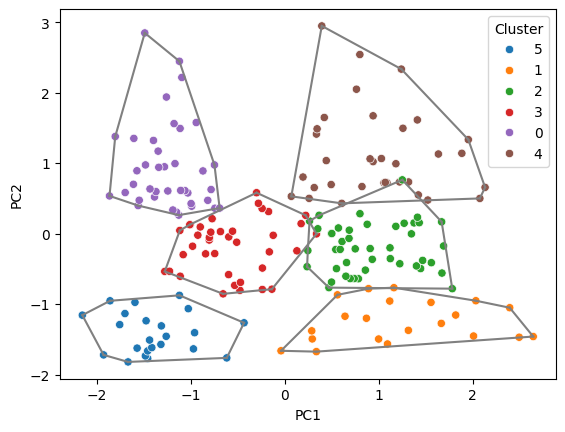

In [7]:
from scipy.spatial import ConvexHull

def plot_convex_hull(data_hull, cl_col, colx="PC1", coly="PC2"):
    # Usa colx, coly para el scatterplot
    #cl_method: nombre de la columna de resultados de clustering, se usa para el hue
    # color, lista de colores, tantos como clusteres
    sns.scatterplot(x=data_hull[colx], y=data_hull[coly], hue=data_hull[cl_col])
    
    for ci in np.unique(data_hull[cl_col]):

        points = np.array(data_hull[[colx, coly]])
        points = points[np.where(data_hull[cl_col] == ci)[0]]
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'grey')

plot_convex_hull(pc_transformation, 'Cluster')
plt.show()

En el gráfico de dispersión utilizando las primeras dos componentes y utilizando el color como indicador del cluster correspondiente, se observa una clara separación entre los seis clusters identificados por el algoritmo K-means. Esta separabilidad sugiere que el número de clusters elegido es adecuado para nuestro estudio de segmentación de clientes, ya que cada grupo tiene características distintivas que los diferencian claramente entre sí. A continuación, procederemos a describir los clusters utilizando las variables originales, lo que nos permitirá comprender mejor las características y comportamientos de cada segmento de clientes identificado.

In [8]:
pd.DataFrame(pca.components_.T, columns=["PC1", "PC2"], index=data.columns[1:])

PC1       PC2
Age                     0.706382  0.030141
Annual Income (k$)     -0.048024  0.998832
Spending Score (1-100) -0.706199 -0.037775

Podemos observar que la componente 1 (PC1) está relacionada principalmente con las variables Age y Spending Score, ya que tienen valores absolutos altos de carga (loading). Por otro lado, la componente 2 (PC2) está relacionada principalmente con la variable Annual Income. 

- Es importante destacar que la relación entre Age y Spending Score es negativa (diferente signo de loading), como se puede apreciar en el heatmap de correlación en el análsis exploratorio. 
- Spendig score tiene baja correlación con ambas variables, es ortogonal a ellas, como podemos observar en el gráfico biplot.
  - Esta relación inversa entre Age y Spending Score sugiere que, en general, a medida que la edad de los clientes aumenta, su puntuación de gasto tiende a disminuir, lo que puede tener implicaciones importantes para estrategias de marketing y segmentación de clientes.

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [3] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.


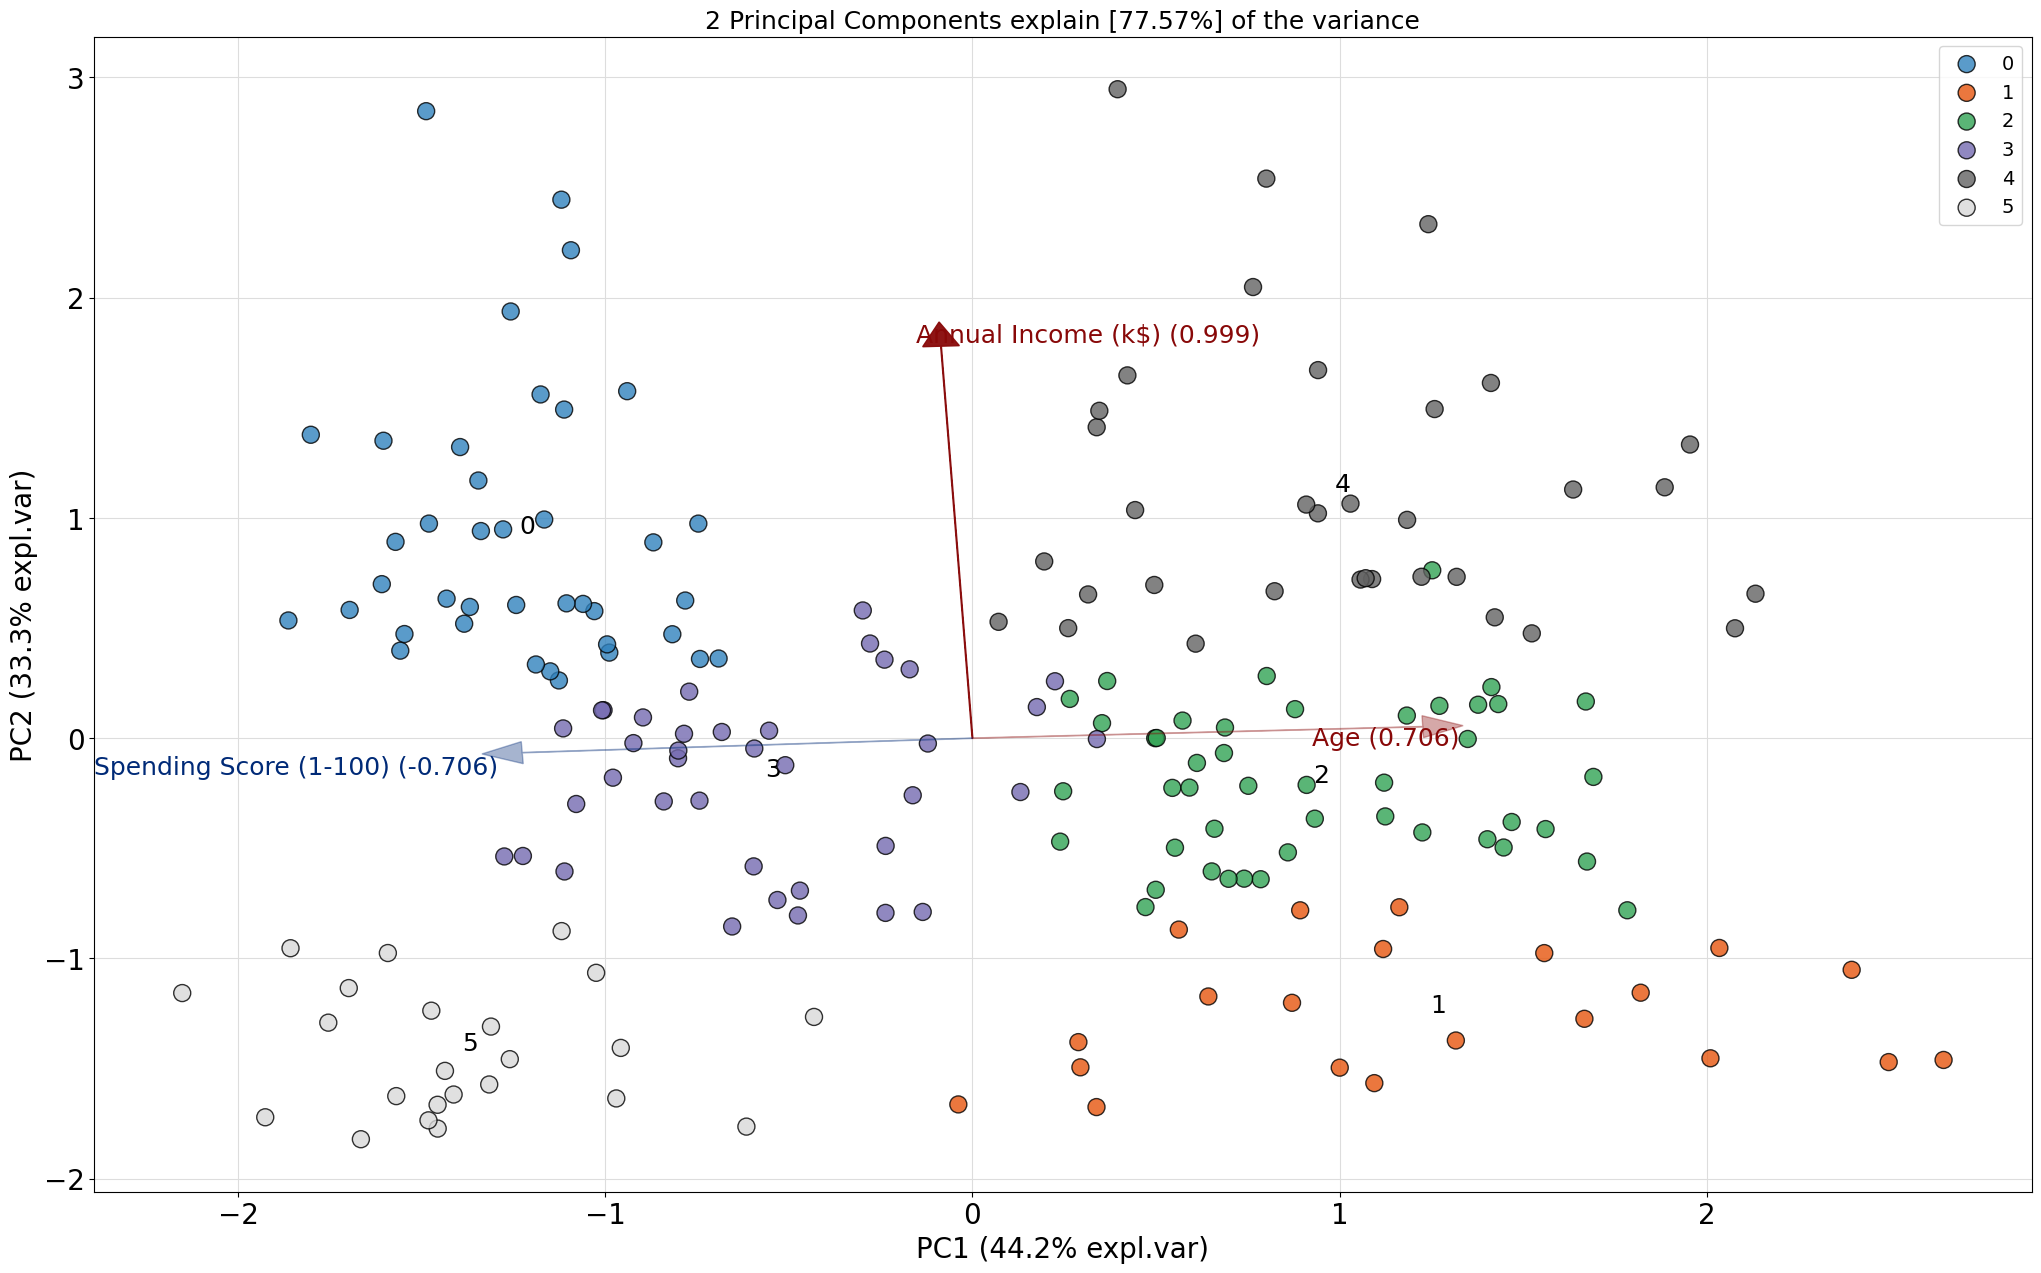

In [9]:
from pca import pca

model = pca(n_components=2)

# Fit and transform
results = model.fit_transform(X=pd.DataFrame(data_scaled, columns=data.columns[1:]), row_labels=kmeans.labels_.astype('str'))

# Create a biplot
fig, ax = model.biplot(n_feat=6)
plt.show()

<a name="jerarquico"></a>

### Clustering jerárquico

- Vamos a comparar los resultados obtenidos mediante el algoritmo KMeans con los del clustering jerárquico, con el fin de determinar cuál de los dos métodos es más apropiado para abordar nuestro problema específico. 
- Analizaremos diversos aspectos, como la cohesión de los clusters, la separación entre ellos y la consistencia de los resultados, para tomar una decisión informada sobre qué método utilizar en nuestro análisis de datos.

(array([0, 1, 2, 3, 4, 5]), array([45, 45, 39, 28, 22, 21]))


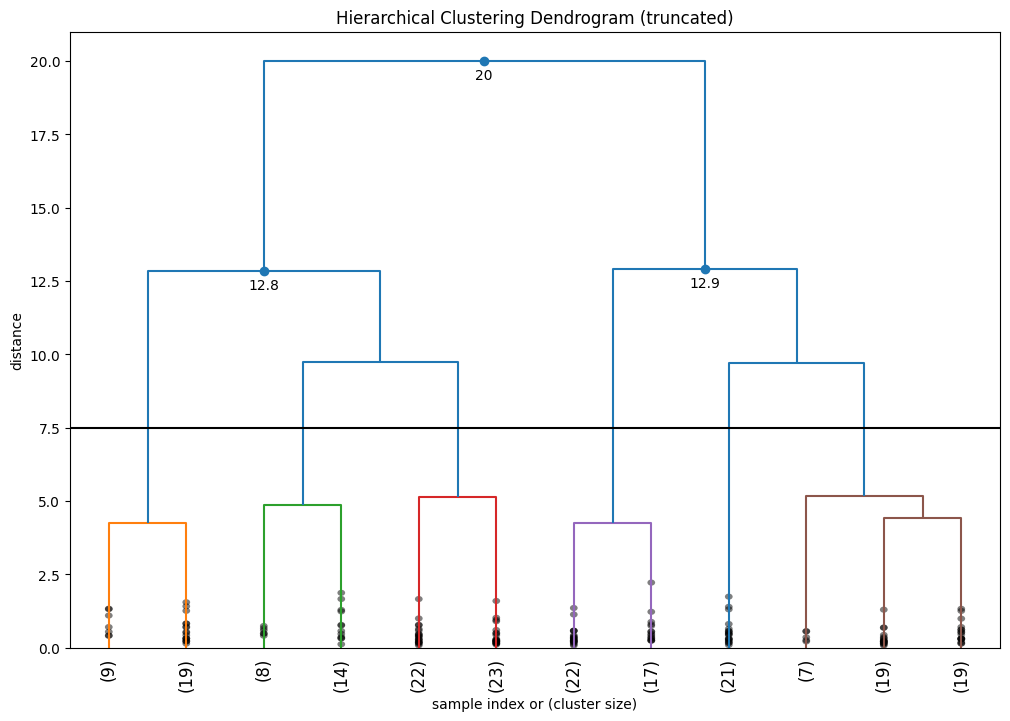

In [10]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
sns.reset_defaults()

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')

    return ddata


cluster = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(data_scaled)
print(np.unique(labels, return_counts=True))
Z = shc.linkage(data_scaled, method='ward')

plt.figure(figsize=(12, 8))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=7.5,
);
plt.show()

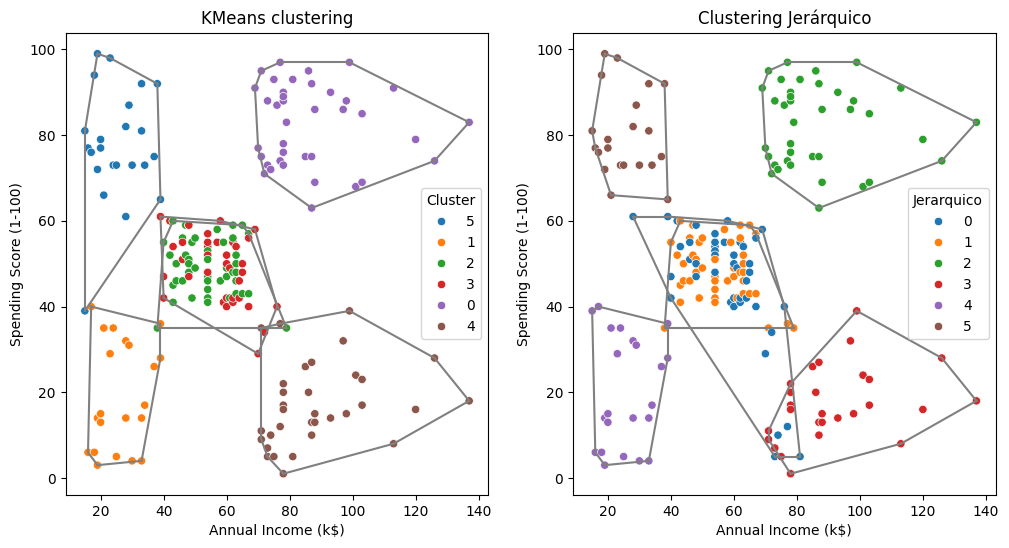

In [11]:
data_cl["Jerarquico"] = pd.Categorical(labels)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_convex_hull(data_cl, 'Cluster', colx="Annual Income (k$)", coly="Spending Score (1-100)")
plt.title("KMeans clustering")
plt.subplot(1,2,2)
plt.title("Clustering Jerárquico")
plot_convex_hull(data_cl, 'Jerarquico', colx="Annual Income (k$)", coly="Spending Score (1-100)")
plt.show()

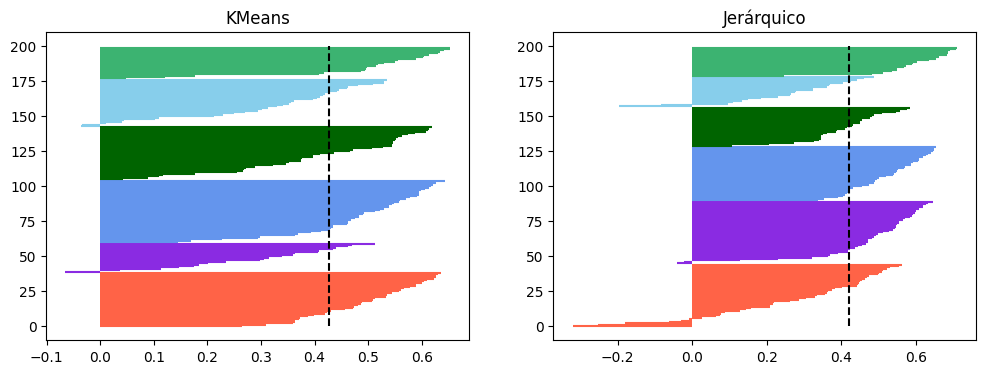

In [12]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

def plot_silhouette_scores(data_scaled, labels):
    
    samples_silhouette_score = silhouette_samples(data_scaled, labels, metric="euclidean")
    
    silhouette_avg = silhouette_score(data_scaled, labels)

    data_ss = pd.DataFrame({"silhouette_score": samples_silhouette_score, 
                            'labels': labels})

    cl, obs_cl = np.unique(data_ss.labels, return_counts=True)
    #print(cl, obs_cl)

    # as many as clusters: 6 clusters
    colorlist =["tomato","blueviolet","cornflowerblue","darkgreen","skyblue","mediumseagreen"]

    for i, cli in enumerate(cl):
        data_ssc = data_ss.query("labels == '"+cli+"'").sort_values(by="silhouette_score")
        for oi,ssi in enumerate(data_ssc.silhouette_score):
            if i > 0:
                oi += obs_cl[:i].cumsum()[-1]
            plt.hlines(oi, 0, ssi, colors=colorlist[i])
    plt.vlines(silhouette_avg, 0, len(labels), linestyle="dashed", colors='k')

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_silhouette_scores(data_scaled, data_cl.Cluster)
plt.title("KMeans")
plt.subplot(1,2,2)
plt.title("Jerárquico")
plot_silhouette_scores(data_scaled, data_cl.Jerarquico.astype('str'))
plt.show()

In [13]:
silhouette_score(data_scaled, data_cl.Cluster), silhouette_score(data_scaled, data_cl.Jerarquico)

(0.4268547747113388, 0.4201169558789579)

<a name="comparacion"></a>

### Comparación de modelos

Al comparar los resultados de ambos métodos de clustering, KMeans y clustering jerárquico, encontramos que ambos generan clusters bien definidos. Esto sugiere una buena calidad del clustering en ambos casos. Sin embargo, al analizar más detenidamente, observamos que la silueta promedio para KMeans, con un valor de 0.4269, es ligeramente mayor que la silueta obtenida para el clustering jerárquico, que registra 0.4201.

Además, notamos un número mayor de inconsistencias para el clustering jerárquico, representadas por observaciones con silueta negativa. Esto indica que algunas de las observaciones podrían haber sido mal asignadas a sus clusters correspondientes en el clustering jerárquico.

Considerando estos resultados, hemos tomado la decisión de seleccionar KMeans como el método preferido para nuestro problema de clustering. La evaluación de silueta sugiere que KMeans ofrece una mejor cohesión y separación entre los clusters en comparación con el clustering jerárquico, lo que lo convierte en la opción más adecuada para nuestro análisis de datos.

### Gráfico de silueta

El análisis de un gráfico de silueta implica evaluar la cohesión y separación de los clusters en un conjunto de datos. Aquí hay algunos consejos para analizar un gráfico de silueta:

1. **Interpretar la longitud de las barras:** Cada barra en el gráfico de silueta representa un punto de datos en el conjunto de datos. La longitud de la barra indica qué tan bien está el punto de datos asignado a su cluster en comparación con otros clusters. Cuanto más larga sea la barra, mejor es la asignación del punto de datos a su propio cluster.

2. **Evaluar la uniformidad de las barras:** Observa la uniformidad de las barras en el gráfico. Un buen clustering se refleja en barras uniformemente largas y delgadas. Esto sugiere que los clusters están bien definidos y que hay una clara separación entre ellos.

3. **Identificar inconsistencias:** Busca barras con longitudes significativamente más cortas o negativas. Estas barras indican puntos de datos que pueden haber sido mal asignados a su cluster, lo que sugiere una mala calidad del clustering en esa área.

4. **Evaluar la separación entre clusters:** Observa la distancia entre las barras de diferentes clusters. Cuanto mayor sea la distancia entre las barras de diferentes clusters, mejor será la separación entre los clusters. Esto indica que los clusters están bien definidos y que hay una clara diferencia entre ellos.

5. **Determinar el número óptimo de clusters:** Utiliza el gráfico de silueta para ayudar a determinar el número óptimo de clusters. Busca un número de clusters que maximice la longitud promedio de las barras en el gráfico de silueta, lo que indica una buena cohesión dentro de los clusters y una clara separación entre ellos.

6. **Silueta promedio:** Si hay clusters con la mayoría de barras por debajo de la silueta promedio, esto indica que esos clusters tienen puntos de datos que están más cerca de los clusters vecinos que de su propio cluster. Esto puede sugerir una mala calidad del clustering en esos grupos y requerir una revisión adicional para comprender y corregir las causas subyacentes de esta discrepancia.

En resumen, al analizar un gráfico de silueta, busca barras uniformemente largas y delgadas, con una clara separación entre clusters y evita barras cortas o negativas que indican puntos de datos mal asignados. Utiliza esta información para evaluar la calidad del clustering y determinar el número óptimo de clusters en tus datos.

<a name="resultados"></a>

### Resultados KMeans

- Vamos a sumarizar los resultados para nuestro problema usando KMeans.

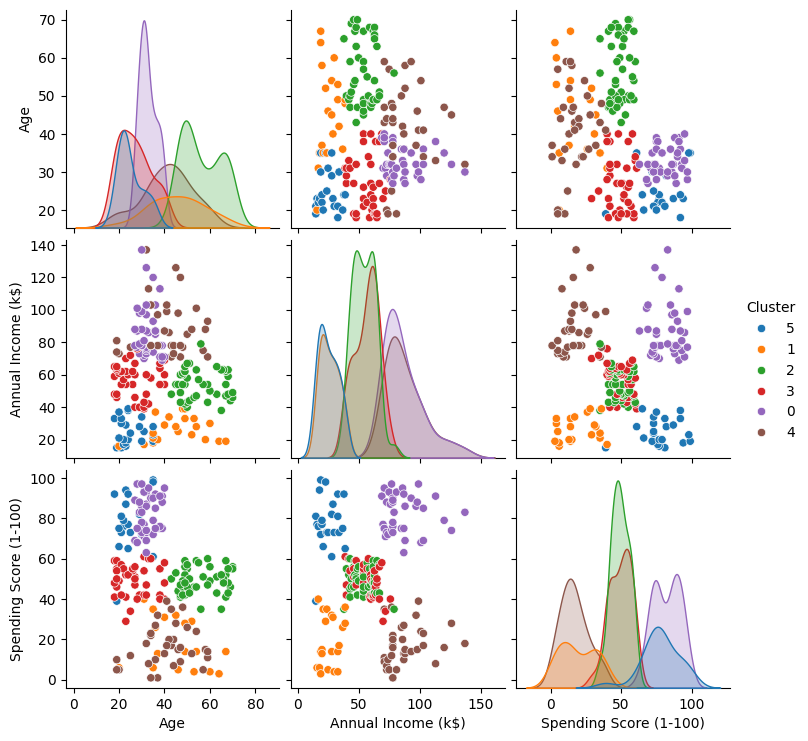

In [14]:
sns.reset_defaults()
sns.pairplot(data_cl, hue="Cluster")
plt.show()

In [15]:
data_cl.groupby("Cluster").describe().T

Cluster                                0          1          2          3  \
Age                    count   39.000000  21.000000  45.000000  38.000000   
                       mean    32.692308  45.523810  56.333333  27.000000   
                       std      3.728650  11.766984   8.453079   7.032742   
                       min     27.000000  20.000000  43.000000  18.000000   
                       25%     30.000000  36.000000  49.000000  21.000000   
                       50%     32.000000  46.000000  54.000000  26.500000   
                       75%     35.500000  53.000000  65.000000  31.750000   
                       max     40.000000  67.000000  70.000000  40.000000   
Annual Income (k$)     count   39.000000  21.000000  45.000000  38.000000   
                       mean    86.538462  26.285714  54.266667  56.657895   
                       std     16.312485   7.437357   8.975725   9.905708   
                       min     69.000000  16.000000  38.000000  39.000000   
                       25%     75.500000  20.000000  47.000000  48.000000   
                       50%     79.000000  25.000000  54.000000  59.500000   
                       75%     95.000000  33.000000  62.000000  63.750000   
                       max    137.000000  39.000000  79.000000  76.000000   
Spending Score (1-100) count   39.000000  21.000000  45.000000  38.000000   
                       mean    82.128205  19.380952  49.066667  49.131579   
                       std      9.364489  12.555780   6.300794   7.853975   
                       min     63.000000   3.000000  35.000000  29.000000   
                       25%     74.500000   6.000000  45.000000  42.000000   
                       50%     83.000000  15.000000  49.000000  50.000000   
                       75%     90.000000  31.000000  55.000000  55.000000   
                       max     97.000000  40.000000  60.000000  61.000000   

Cluster                                4          5  
Age                    count   34.000000  23.000000  
                       mean    41.264706  25.000000  
                       std     10.768385   5.300086  
                       min     19.000000  18.000000  
                       25%     34.500000  21.000000  
                       50%     42.500000  23.000000  
                       75%     47.000000  29.500000  
                       max     59.000000  35.000000  
Annual Income (k$)     count   34.000000  23.000000  
                       mean    88.500000  25.260870  
                       std     16.533254   7.723738  
                       min     71.000000  15.000000  
                       25%     77.250000  19.000000  
                       50%     85.500000  24.000000  
                       75%     97.750000  31.500000  
                       max    137.000000  39.000000  
Spending Score (1-100) count   34.000000  23.000000  
                       mean    16.764706  77.608696  
                       std      9.881292  13.272457  
                       min      1.000000  39.000000  
                       25%     10.000000  73.000000  
                       50%     15.500000  77.000000  
                       75%     22.750000  84.500000  
                       max     39.000000  99.000000

### Entendiendo nuestros grupos (clústeres)

### Consumidores compulsivos

**Cluster 0:**
- Características demográficas: Edad promedio de 39 años.
- Comportamiento de compra: Spending score alto, con una media de 82.12.
- Ingresos: Ingreso promedio de 86 mil dólares.

Posibles tipos de personas en el cluster 0 podrían incluir:
1. Profesionales establecidos: Personas en la mediana edad con ingresos sólidos y una capacidad de gasto considerable. Podrían estar en una etapa de la vida donde tienen más estabilidad financiera y pueden permitirse gastar más en productos o servicios de lujo.
2. Doble ingreso familiar: Parejas o familias con dos ingresos, lo que les permite tener un mayor poder adquisitivo y gastar más en experiencias o productos premium.
3. Gerentes o ejecutivos: Individuos en posiciones de liderazgo o con altos niveles de responsabilidad en sus carreras, lo que se refleja en sus ingresos más altos y su disposición a gastar en productos de alta calidad.

**Cluster 5:**
- Características demográficas: Edad promedio de 23 años.
- Comportamiento de compra: Spending score alto, con una media de 77.60.
- Ingresos: Ingreso promedio de 25 mil dólares.

Posibles tipos de personas en el cluster 5 podrían incluir:
1. Estudiantes universitarios o recién graduados: Jóvenes adultos que están comenzando su carrera profesional o educación superior y que pueden tener un ingreso más bajo pero un alto interés en gastar en experiencias sociales y entretenimiento.
2. Jóvenes profesionales en inicio de carrera: Individuos en sus primeros años de carrera profesional, que pueden tener ingresos iniciales más bajos pero están dispuestos a gastar en productos y servicios que mejoren su estilo de vida o su imagen personal.
3. Trabajadores a tiempo parcial: Personas que están trabajando a tiempo parcial o en trabajos temporales, lo que puede resultar en ingresos más bajos pero que aún así tienen la disposición de gastar en actividades de ocio y entretenimiento.

### Consumidores ahorrador

**Cluster 1:**
- Características demográficas: Edad promedio de 45 años.
- Comportamiento de compra: Spending score bajo, con una media de 19.38.
- Ingresos: Ingreso promedio de 26.28 mil dólares.

Posibles tipos de personas en el cluster 1 podrían incluir:
1. Jubilados o personas mayores: Individuos en la tercera edad que tienen ingresos más limitados pero que aún están activos en la comunidad y tienen necesidades de consumo más básicas. Pueden ser más conservadores en sus gastos y priorizar el ahorro sobre el consumo discrecional.
2. Trabajadores de bajos ingresos: Personas con ingresos más bajos que pueden estar trabajando en empleos de nivel de entrada o en industrias con salarios más bajos. Pueden estar limitados en su capacidad de gasto y priorizar el gasto en necesidades básicas como vivienda y alimentación.

**Cluster 4:**
- Características demográficas: Edad promedio de 41 años.
- Comportamiento de compra: Spending score bajo, con una media de 16.76.
- Ingresos: Ingreso promedio de 88.50 mil dólares.

Posibles tipos de personas en el cluster 4 podrían incluir:
1. Familias de clase media: Hogares con ingresos medios que pueden estar priorizando el ahorro y la inversión a largo plazo sobre el gasto discrecional. Pueden tener una mentalidad financiera conservadora y buscar obtener el máximo valor por su dinero en sus decisiones de compra.
2. Profesionales en etapas tempranas de su carrera: Individuos en sus años intermedios de carrera que pueden estar enfocados en construir una base financiera sólida y establecerse en sus campos profesionales antes de gastar en lujos o comodidades adicionales.

### Consumidores reflexivos (ni compulsivo ni ahorrador)

**Cluster 2:**
- Características demográficas: Edad promedio de 45 años.
- Comportamiento de compra: Spending score mediano, con una media de 45.0.
- Ingresos: Ingreso medio, ni alto ni bajo, con un promedio de 54.26 mil dólares.

Posibles tipos de personas en el cluster 2 podrían incluir:
1. Familias de clase media: Hogares con ingresos medios que pueden tener una disposición a gastar moderada y priorizar el equilibrio entre ahorro y consumo. Pueden estar interesados en productos y servicios de calidad a precios razonables y buscar obtener el máximo valor por su dinero en sus decisiones de compra.
2. Profesionales establecidos: Individuos en la mediana edad que tienen una estabilidad financiera y pueden permitirse gastar de manera moderada en bienes y servicios que mejoren su calidad de vida. Pueden estar más enfocados en la calidad y la durabilidad de los productos que en las tendencias de consumo a corto plazo.

**Cluster 3:**
- Características demográficas: Edad promedio de 38 años.
- Comportamiento de compra: Spending score mediano, con una media de 38.
- Ingresos: Ingreso medio, ni alto ni bajo, con un promedio de 56.65 mil dólares.

Posibles tipos de personas en el cluster 3 podrían incluir:
1. Profesionales jóvenes: Individuos en sus años de carrera temprana que tienen ingresos medios pero que aún están estableciendo su posición financiera y priorizando el ahorro. Pueden tener una disposición moderada a gastar en experiencias sociales y productos de moda, pero aún así ejercen cierta prudencia en sus decisiones de compra.
2. Familias jóvenes: Parejas o familias jóvenes que tienen ingresos medios y pueden estar priorizando la construcción de un futuro financiero sólido sobre el gasto discrecional. Pueden estar más enfocados en la compra de bienes duraderos y en la planificación financiera a largo plazo que en las compras impulsivas o de lujo.

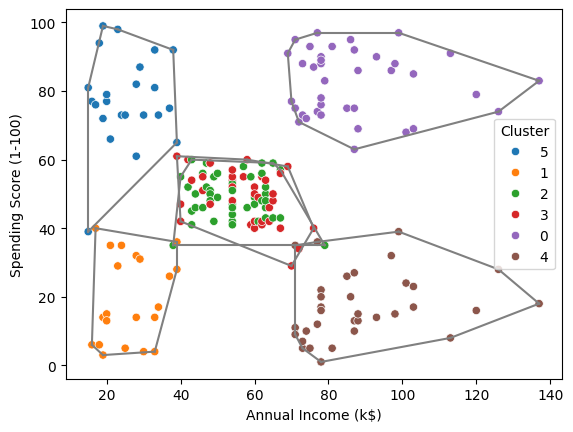

In [16]:
plot_convex_hull(data_cl, 'Cluster', colx="Annual Income (k$)", coly="Spending Score (1-100)")
plt.show()

En nuestro gráfico de dispersión utilizando las variables Annual Income (k$) y Spending Score (1-100), se observa una clara separabilidad para todos los grupos, con excepción de los clusters 2 y 3, representados en verde y rojo, respectivamente. Sin embargo, al visualizar los datos en un gráfico de dispersión en tres dimensiones, utilizando la variable de edad, ahora podemos apreciar la separabilidad de los clusters 2 y 3. Esto se debe a que la técnica de PCA nos mostraba esta separabilidad al reducir la dimensionalidad del conjunto de datos, conservando la mayor varianza de las variables originales. Dado que la componente principal 1 (PC1) está relacionada con la edad, es en esta dimensión donde se observa la separabilidad entre los clusters 2 y 3 en el gráfico de dispersión PC1 vs PC2.

In [17]:
import plotly.express as px

fig = px.scatter_3d(data_cl, x="Annual Income (k$)", 
                    y="Spending Score (1-100)", 
                    z='Age',
                    color='Cluster')
fig.update_traces(marker_size = 4)
fig.show()

### Resultados por Género

Aunque hemos decidido no incluir la variable género en la construcción de los clusters debido a su falta de relevancia en el proceso de segmentación, es importante reconocer que el género aún puede desempeñar un papel significativo en otros aspectos de nuestro análisis y estrategias de marketing. Aunque el género puede no haber sido un factor diferenciador clave en la formación de los clusters, puede seguir siendo una variable importante a considerar en la personalización de campañas publicitarias, estrategias de comunicación y desarrollo de productos. 

Por ejemplo, ciertos productos o servicios pueden tener una mayor relevancia o atractivo para un género en particular debido a diferencias en preferencias, necesidades o comportamientos de compra. En tales casos, la segmentación basada en el género puede ser beneficiosa para dirigir mensajes específicos y adaptados a cada grupo demográfico. Además, al tener en cuenta el género en nuestras estrategias de marketing, podemos garantizar una mayor relevancia y efectividad en nuestras campañas al dirigirnos a audiencias específicas de manera más precisa.

Por lo tanto, aunque no hemos utilizado la variable género en la creación de clusters, debemos mantenerla presente en nuestro análisis y considerar su impacto en nuestras decisiones estratégicas de marketing y comunicación. Al hacerlo, podemos aprovechar al máximo la información disponible y garantizar una mayor efectividad en nuestras iniciativas de marketing.

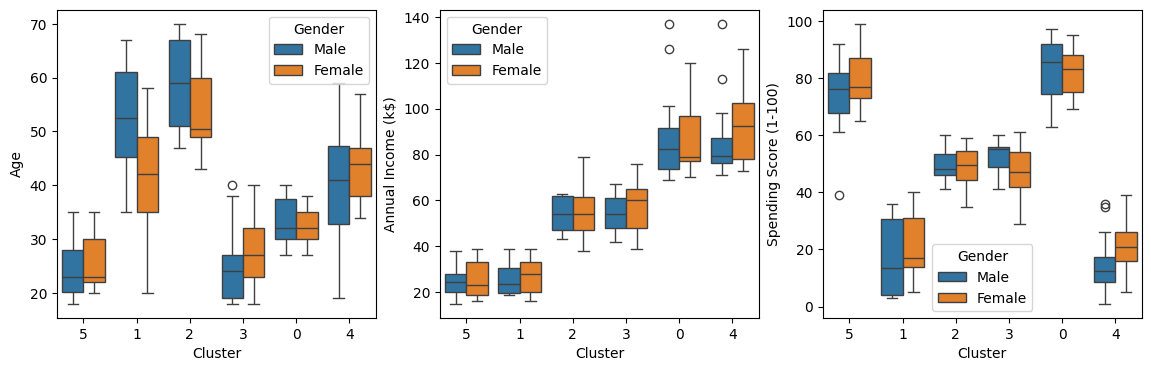

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.boxplot(data=data_cl, x="Cluster", y="Age", hue="Gender")
plt.subplot(1,3,2)
sns.boxplot(data=data_cl, x="Cluster", y="Annual Income (k$)", hue="Gender")
plt.subplot(1,3,3)
sns.boxplot(data=data_cl, x="Cluster", y="Spending Score (1-100)", hue="Gender")

plt.show()

Por ejemplo, podemos observar que en los clusters 1 y 2, la edad de las mujeres es menor que la de los hombres, mientras que en los clusters 3 y 5, la edad de los hombres es menor que la de las mujeres. Por otro lado, en los clusters 0 y 4, las edades son muy similares entre ambos géneros.

En cuanto al ingreso medio, en los clusters 1, 3 y 4, los hombres tienen ingresos menores, mientras que en el cluster 0, las mujeres tienen ingresos menores según la mediana.

En cuanto al spending score, se observa que en la mayoría de los clusters, el spending score de los hombres es menor, con la excepción del grupo 3, donde es considerablemente mayor para los hombres. En el grupo 0, el spending score es muy similar para ambos géneros.

Estos hallazgos sugieren que hay diferencias en las características demográficas y de comportamiento de compra entre hombres y mujeres en los diferentes clusters, lo que puede ser importante tener en cuenta al desarrollar estrategias de marketing y segmentación de clientes.

<a name="implicaciones"></a>

### Implicaciones empresariales

1. **Segmentación de clientes:** Utilizar los clusters identificados para segmentar la base de clientes del centro comercial en grupos más específicos, como jóvenes profesionales, familias jóvenes, personas mayores, etc., y dirigir estrategias de marketing y promociones de manera más precisa hacia cada uno de estos grupos.

2. **Personalización de servicios:** Adaptar los servicios ofrecidos en el centro comercial según las preferencias y comportamientos de compra de cada segmento de clientes. Por ejemplo, ofrecer eventos y actividades específicas para cada grupo demográfico o proporcionar servicios adicionales como asesoramiento personalizado de compras para grupos específicos.

3. **Optimización de la mezcla de productos:** Identificar qué tipos de productos o servicios son más populares en cada segmento de clientes y ajustar la oferta del centro comercial en consecuencia. Por ejemplo, si el segmento de jóvenes profesionales muestra interés en productos tecnológicos y de moda, el centro comercial puede aumentar su oferta en estas categorías.

4. **Estrategias de precios:** Desarrollar estrategias de precios diferenciadas según los diferentes segmentos de clientes. Por ejemplo, ofrecer descuentos especiales para personas mayores en determinados días de la semana o establecer programas de lealtad con beneficios exclusivos para jóvenes profesionales.

5. **Desarrollo de campañas de marketing:** Crear campañas de marketing específicas para cada segmento de clientes, utilizando mensajes y canales de comunicación adaptados a las características demográficas y comportamientos de compra de cada grupo. Por ejemplo, utilizar redes sociales para promocionar eventos y ofertas dirigidas a familias jóvenes, mientras que se pueden utilizar anuncios en medios tradicionales para llegar a personas mayores.

6. **Fomento de la lealtad del cliente:** Implementar programas de fidelización y recompensas diseñados para satisfacer las necesidades y preferencias de cada segmento de clientes. Por ejemplo, ofrecer descuentos exclusivos para clientes recurrentes en tiendas populares entre los jóvenes profesionales.

7. **Optimización del diseño del centro comercial:** Revisar el diseño y la disposición de las tiendas y servicios dentro del centro comercial para maximizar su atractivo y adaptarse a las preferencias de los diferentes grupos de clientes. Por ejemplo, ubicar tiendas de moda y tecnología en áreas frecuentadas por jóvenes profesionales, mientras que se pueden ubicar tiendas de conveniencia y servicios para personas mayores en áreas de fácil acceso.

8. **Identificación de oportunidades de crecimiento:** Identificar áreas de oportunidad para expandir la oferta de productos o servicios en el centro comercial, así como para atraer nuevos segmentos de clientes no cubiertos anteriormente. Por ejemplo, abrir nuevas tiendas especializadas que satisfagan las necesidades específicas de grupos demográficos emergentes en la zona.

9. **Mejora continua:** Utilizar los datos y hallazgos del estudio para realizar evaluaciones periódicas y ajustar las estrategias y operaciones del centro comercial en función de las tendencias y cambios en el comportamiento de los clientes. Por ejemplo, realizar encuestas periódicas para evaluar la satisfacción de los clientes y realizar cambios en la oferta de servicios según los resultados obtenidos.

10. **Competitividad:** Mejorar la posición competitiva del centro comercial en el mercado al ofrecer una experiencia de compra más relevante y personalizada en comparación con la competencia. Por ejemplo, destacar las ventajas únicas del centro comercial, como su amplia oferta de servicios para personas mayores o su programa de eventos dirigidos a jóvenes profesionales, para atraer a nuevos clientes y fomentar la lealtad de los existentes.

<a name="conclusiones"></a>

### Conclusiones

El análisis detallado de los clientes del centro comercial ha proporcionado información valiosa que puede ser aprovechada para mejorar significativamente la experiencia del cliente y optimizar las operaciones del centro comercial. Al segmentar nuestra base de clientes en grupos más específicos mediante el análisis de clusters, hemos identificado patrones claros en las características demográficas y comportamientos de compra, lo que nos permite comprender mejor las necesidades y preferencias de nuestros clientes.

Estos hallazgos nos permiten tomar decisiones estratégicas más informadas y desarrollar acciones concretas para atender de manera más efectiva a nuestros distintos grupos de clientes. Desde la personalización de servicios hasta la optimización del mix de productos y la implementación de estrategias de marketing dirigidas, contamos con una variedad de herramientas a nuestra disposición para maximizar la satisfacción del cliente y aumentar la rentabilidad del centro comercial.

Es importante destacar que el estudio de los clientes es un proceso continuo y dinámico. A medida que las tendencias y preferencias cambian, es fundamental adaptar nuestras estrategias y acciones en consecuencia. Por lo tanto, es recomendable realizar evaluaciones periódicas y estar abiertos a realizar ajustes y mejoras en función de la retroalimentación de los clientes y los cambios en el mercado.

Al utilizar de manera efectiva los insights obtenidos de este estudio, estamos en una posición favorable para diferenciarnos de la competencia, fortalecer la lealtad de nuestros clientes y asegurar el éxito continuo del centro comercial en un mercado cada vez más competitivo y cambiante.

**Recomendaciones**

1. Personalización de servicios: Utilizar la segmentación de clientes para adaptar los servicios ofrecidos en el centro comercial según las preferencias de cada grupo demográfico. Por ejemplo, ofrecer eventos y actividades específicas para familias los fines de semana o servicios de asesoramiento de compras para jóvenes profesionales.

2. Estrategias de marketing dirigidas: Desarrollar campañas de marketing específicas para cada segmento de clientes, utilizando mensajes y canales de comunicación que resuenen con las características y comportamientos de cada grupo. Esto puede incluir publicidad en redes sociales, anuncios en medios tradicionales y promociones personalizadas.

3. Optimización del mix de productos: Ajustar la oferta de productos y servicios en el centro comercial según las preferencias de cada grupo de clientes. Por ejemplo, aumentar la oferta de productos tecnológicos y de moda para jóvenes profesionales, mientras que se pueden ofrecer descuentos especiales para productos de cuidado del hogar para personas mayores.

4. Mejora de la experiencia del cliente: Implementar medidas para mejorar la experiencia general del cliente en el centro comercial, como la optimización del diseño y la disposición de las tiendas, la mejora de la señalización y la navegación, y la ampliación de las opciones de estacionamiento y comodidades.

5. Fomento de la lealtad del cliente: Establecer programas de fidelización y recompensas diseñados para incentivar la repetición de visitas y compras en el centro comercial. Esto puede incluir descuentos exclusivos, eventos especiales y beneficios adicionales para clientes frecuentes.

6. Evaluación periódica y ajuste: Realizar evaluaciones periódicas de la efectividad de las estrategias implementadas y ajustarlas según sea necesario en función de las tendencias y cambios en el comportamiento de los clientes. Esto garantizará que el centro comercial siga siendo relevante y competitivo en un entorno comercial en constante evolución.

<a name="anexo"></a>
### Ejercicio 

- **Realice un análisis del dataset agrupado por clústeres**
  - Ejecute el script a continuación
  - Puede usar las columnas Cluster (KMeans) y Jerarquico para realizar el análisis exploratorio y entender los resultados
  - **Debe ejecutar todo el notebook previo a este ejercicio.**

In [19]:
from viz import *
import warnings 
warnings.filterwarnings("ignore")

all_data ={'data_clusters': data_cl}
plot_data(all_data)

interactive(children=(Dropdown(description='ds', options=('data_clusters',), value='data_clusters'), Dropdown(…